In [1]:
pwd

'/content'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/PBL6

/content/drive/MyDrive/PBL6


In [6]:
import numpy as np
import torch
import torchvision
import pickle
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
class Dataset(object):
    """An abstract class representing a Dataset.
    All other datasets should subclass it. All subclasses should override
    ``__len__``, that provides the size of the dataset, and ``__getitem__``,
    supporting integer indexing in range from 0 to len(self) exclusive.
    """

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])

In [8]:
class Dataset_sino(Dataset):

    def __init__(self, file_path_x, file_path_y, transform=None):
        print('Loading Data....')
        with open(file_path_x, 'rb') as x:
            X = pickle.load(x)
        print('X loaded.')
        with open(file_path_y, 'rb') as y:
            Y = pickle.load(y)
        print('Y loaded.\n')

        self.data_x = X
        self.data_y = Y
        self.transform = transform

    def __len__(self):
        return len(self.data_x)

    def __getitem__(self, index):
        # load image as ndarray type (Height * Width * Channels)
        # be carefull for converting dtype to np.uint8 [Unsigned integer (0 to 255)]
        # in this example, i don't use ToTensor() method of torchvision.transforms
        # so you can convert numpy ndarray shape to tensor in PyTorch (H, W, C) --> (C, H, W)
        train_image = self.data_x[index, :, : ,:]
        test_image = self.data_y[index, :, :, :]

        if self.transform is not None:
            train_image = self.transform(train_image)
            test_image = self.transform(test_image)

        return train_image, test_image

    def get_target(self):
        return self.data_y

    def get_train(self):
        return self.data_x

In [9]:
unzipPath = "./"

In [10]:
!unzip -q X.pkl.zip -d $unzipPath

In [11]:
!unzip -q Y.pkl.zip -d $unzipPath

In [12]:
IMG_HEIGHT = 64
IMG_WIDTH = 64
IMG_CHANNELS = 1
TRANSFORM = torchvision.transforms.ToTensor()
TEST_PATH_X = './X.pkl'
TEST_PATH_Y = './Y.pkl'

In [13]:
# Load Dataset
print('\n')
print('#'*35)
print('# Load Training & Validation Data #')
print('#'*35)
print('Train:')
full_dataset = Dataset_sino(TEST_PATH_X, TEST_PATH_Y,transform = TRANSFORM)



###################################
# Load Training & Validation Data #
###################################
Train:
Loading Data....
X loaded.
Y loaded.



In [14]:
Y = full_dataset.get_target()
#Y_t =  torch.FloatTensor(Y)

In [15]:
def show(img):
    plt.figure(figsize=(20,40))
    plt.imshow(img, cmap = "Greys")
    plt.show()

def get_sinogram(patches):
    m = patches[0,:,:32]
    for i, patch in enumerate(patches[1:]):
        if i == len(patches)-2:
            m = np.concatenate((m, patch[:,:]), axis = 1)
        else:
            m = np.concatenate((m, patch[:,:32]), axis = 1)
    return m

In [16]:
images=[]
for i in range(int(100000/15)):
    images.append(get_sinogram(Y[i*15:i*15+15,:,:,0]))

In [18]:
len(images)

6666

In [19]:
images[0].shape

(64, 512)

In [20]:
sino_list =[]
for i in range(int(len(images)/7)):
    sino = images[i*7]
    for patch in images[i*7+1:i*7+7]:
        sino = np.concatenate((sino, patch[44:,:]), axis = 0)
    sino_list.append(sino)

In [21]:
sino.shape

(184, 512)

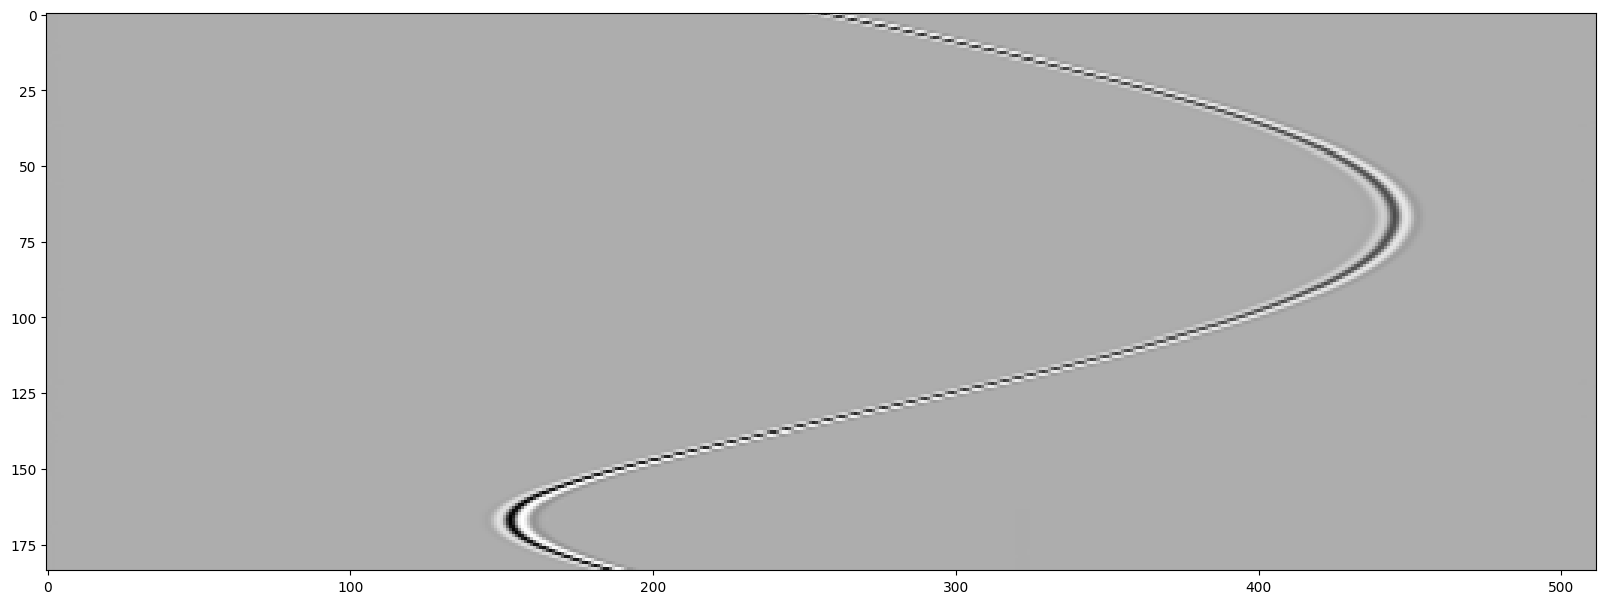

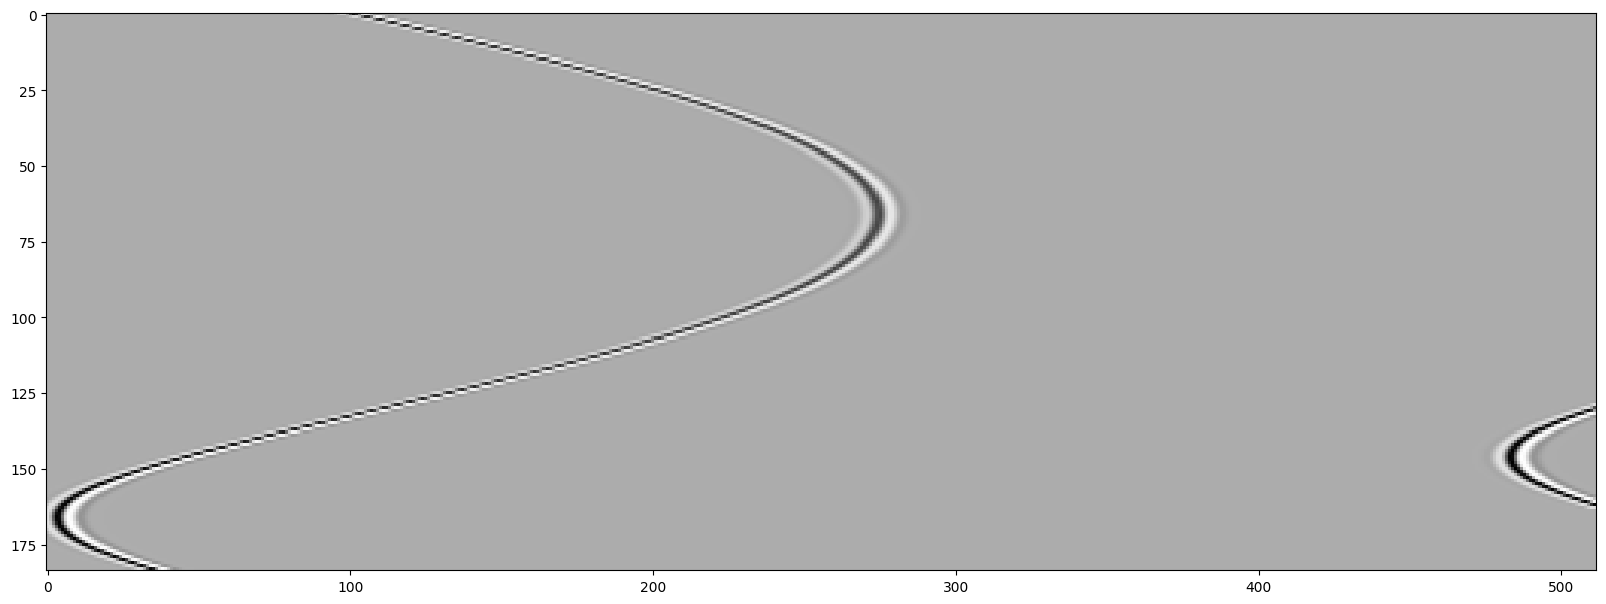

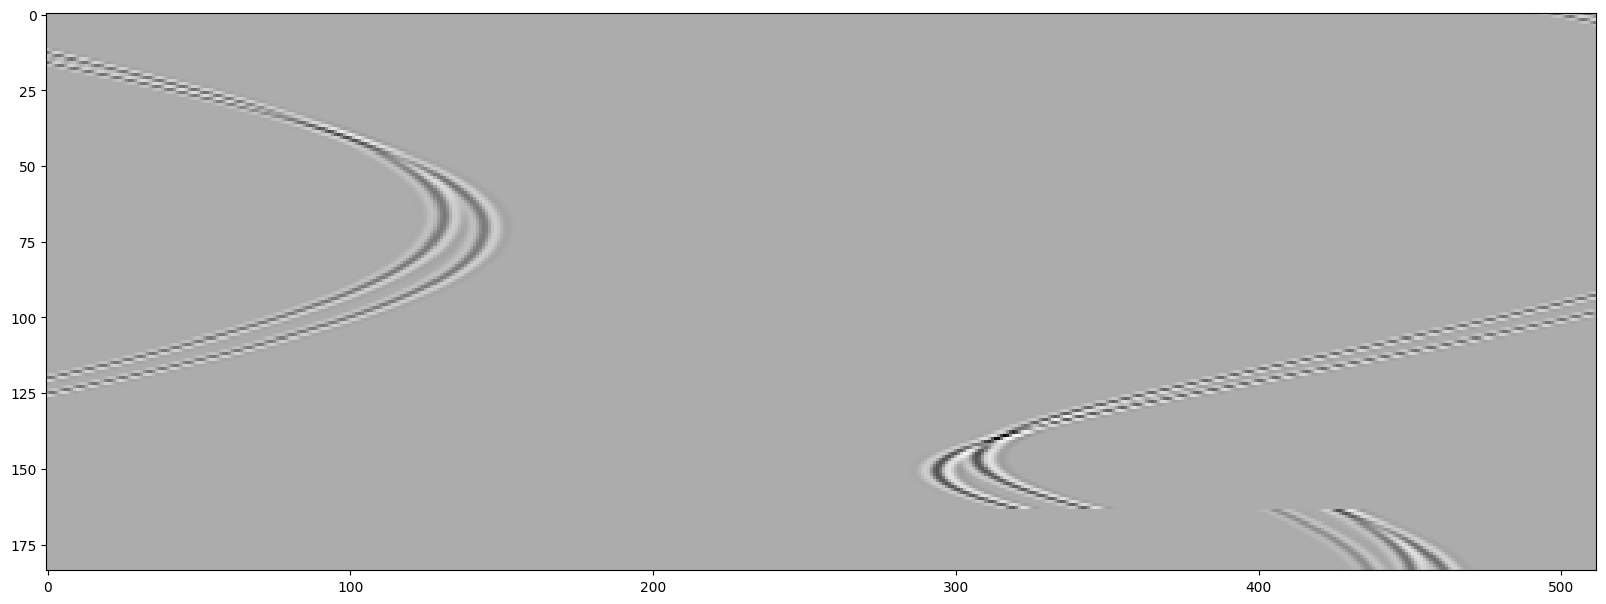

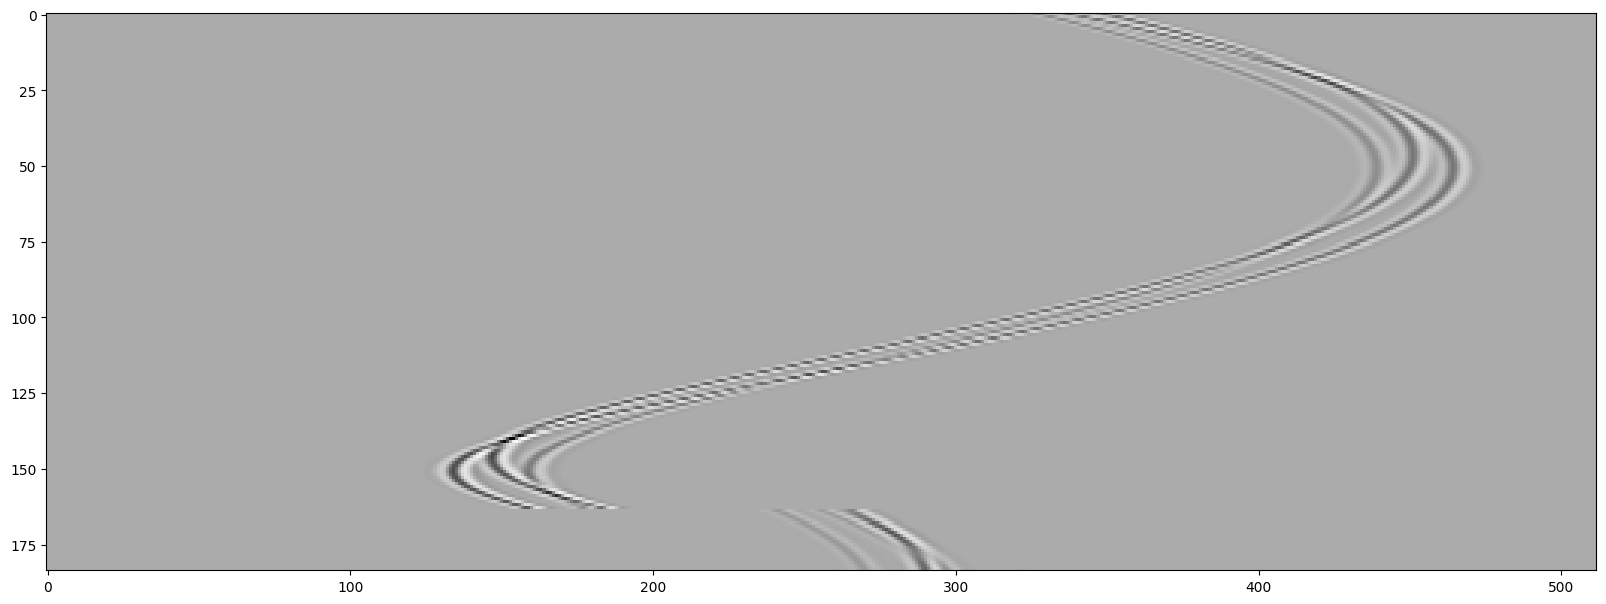

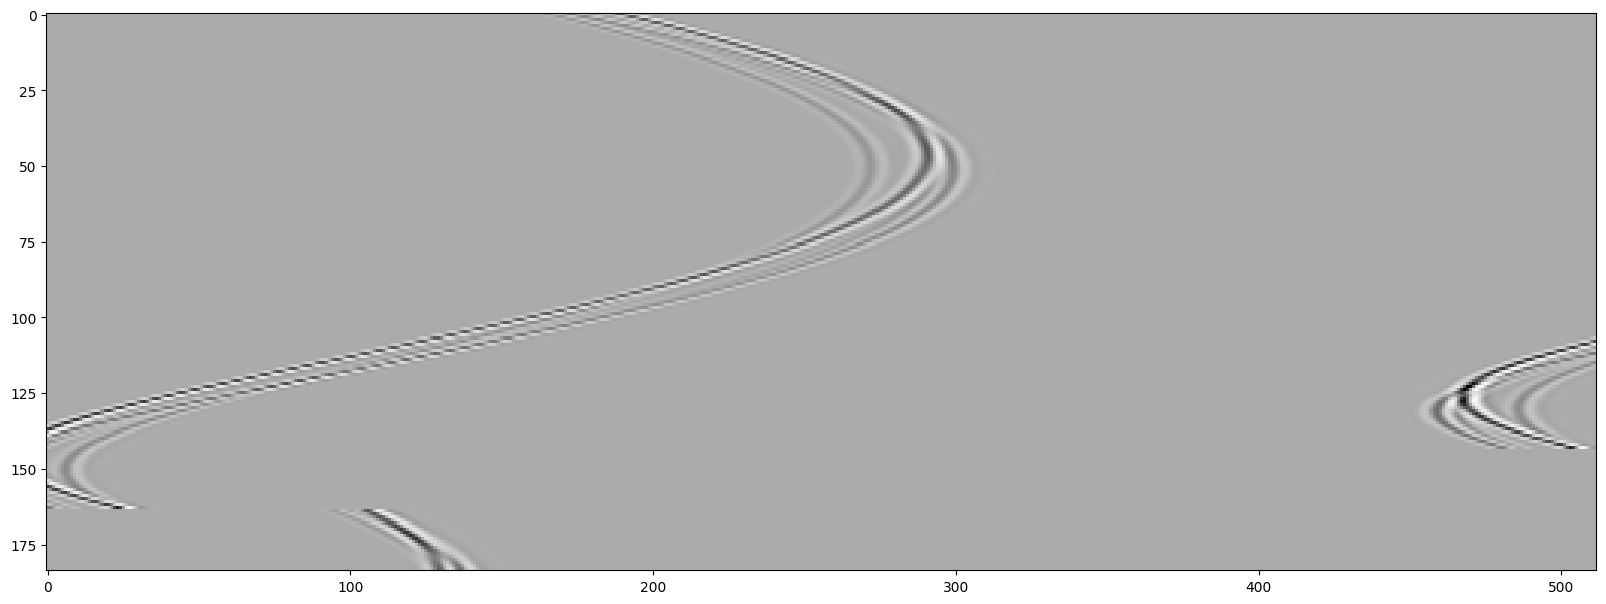

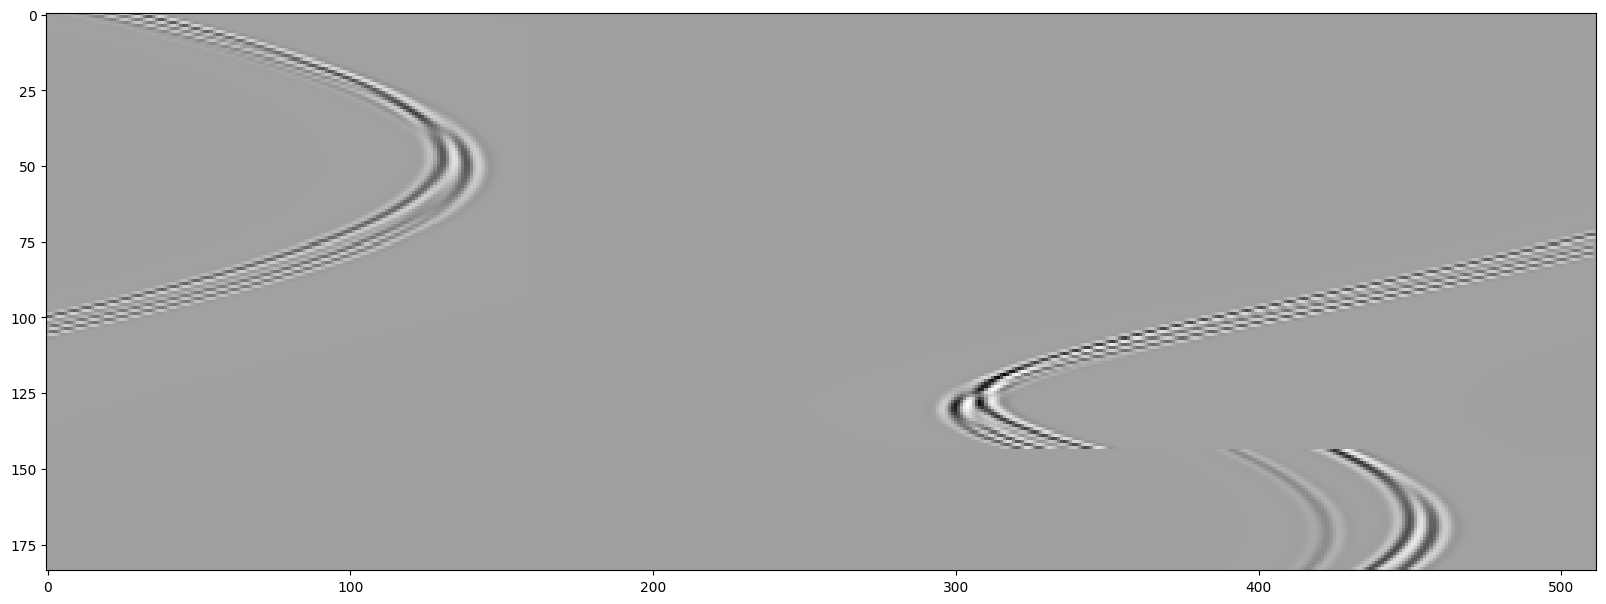

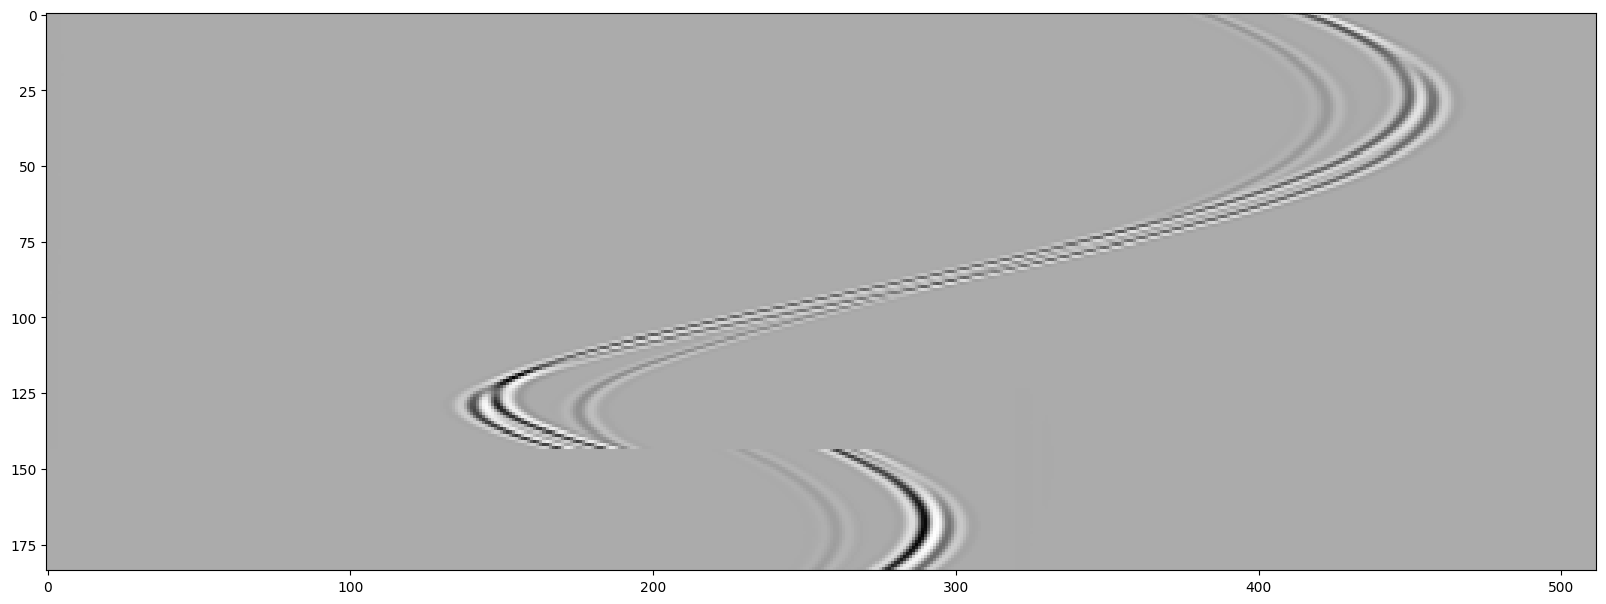

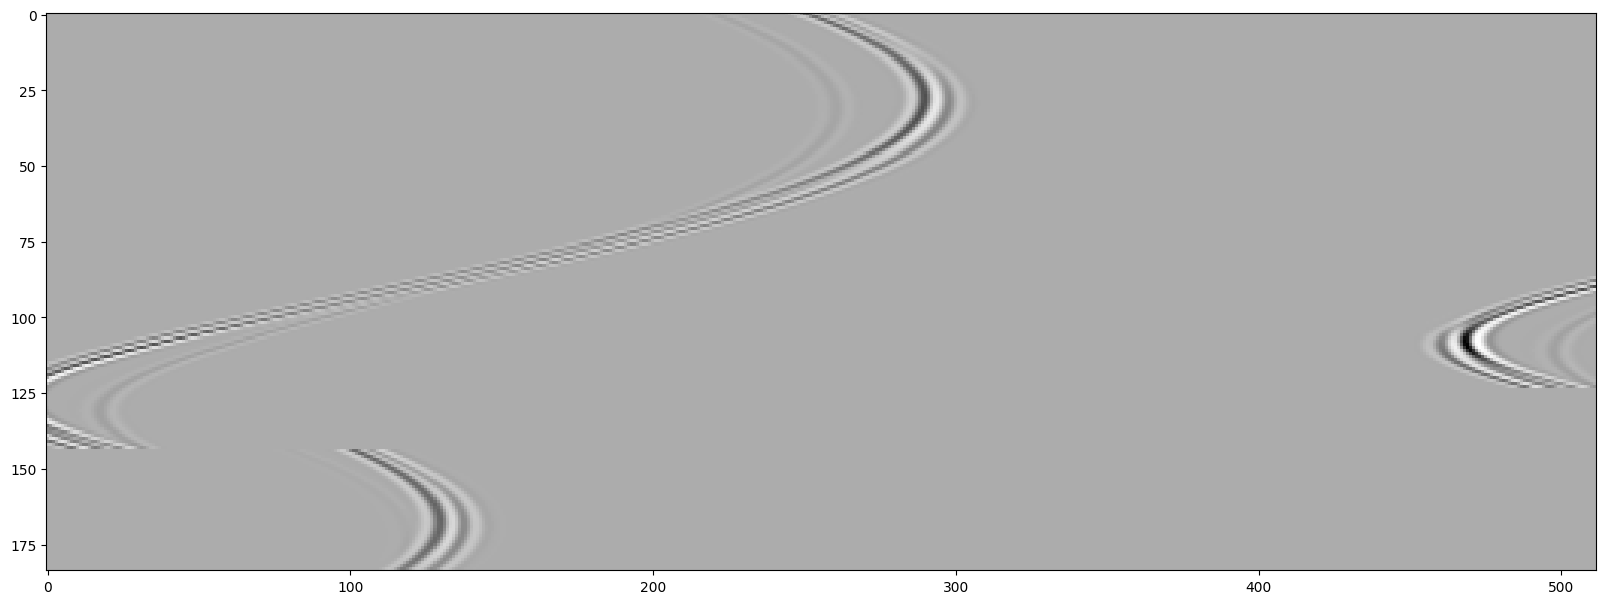

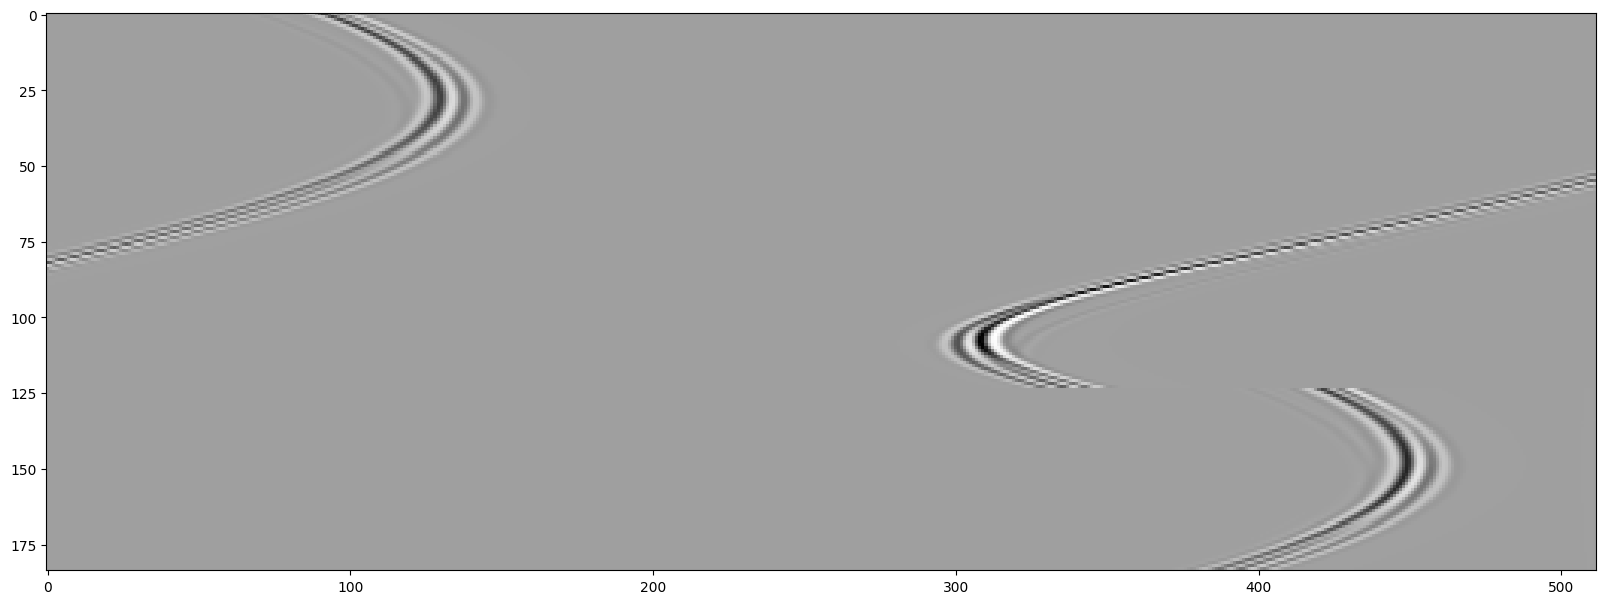

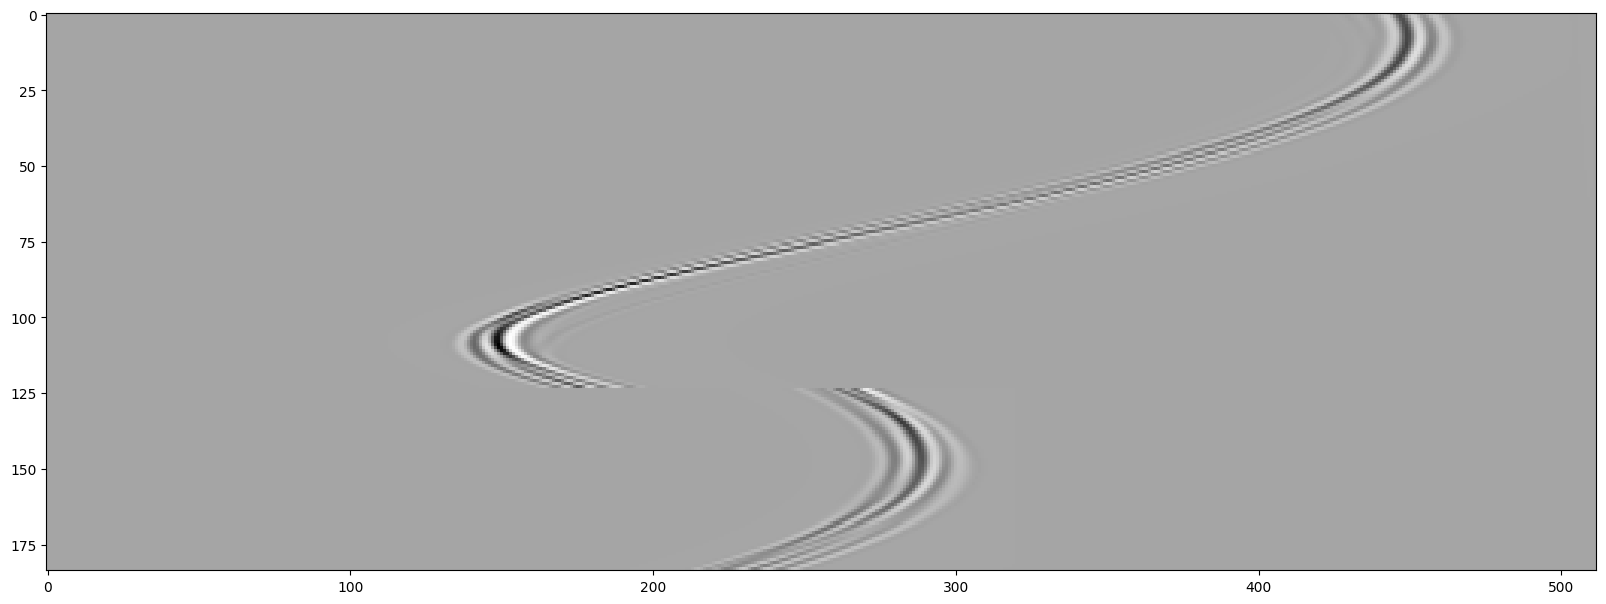

In [22]:
for i in range(10):
    show(sino_list[i])